In [3]:
import gym
import gym_2048

In [46]:
import numpy as np

In [1]:
from tensorforce import Agent, Environment

In [33]:
from PIL import Image, ImageDraw, ImageFont

In [4]:
environment = Environment.create(
    environment='gym', level='2048-v0', max_episode_timesteps=500
)

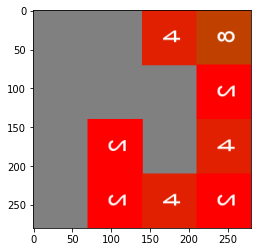

In [43]:
imshow(environment._environment.environment.render(mode="rgb_array"))
#Image.fromarray(test, mode="RGB")

In [41]:
from matplotlib.pyplot import imshow

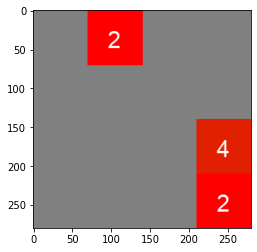

In [50]:
env = gym.make('2048-v0')
env.step(0)
env.step(1)
env.step(2)

black = (0, 0, 0)
grey = (128, 128, 128)
white = (255, 255, 255)
tile_colour_map = {
    2: (255, 0, 0),
    4: (224, 32, 0),
    8: (192, 64, 0),
    16: (160, 96, 0),
    32: (128, 128, 0),
    64: (96, 160, 0),
    128: (64, 192, 0),
    256: (32, 224, 0),
    512: (0, 255, 0),
    1024: (0, 224, 32),
    2048: (0, 192, 64),
    4096: (0, 160, 96),
}
grid_size = env.grid_size

# Render with Pillow
pil_board = Image.new("RGB", (grid_size * 4, grid_size * 4))
draw = ImageDraw.Draw(pil_board)
draw.rectangle([0, 0, 4 * grid_size, 4 * grid_size], grey)
fnt = ImageFont.truetype('Arial.ttf', 30)

for y in range(4):
  for x in range(4):
     o = env.get(y, x)
     if o:
         draw.rectangle([x * grid_size, y * grid_size, (x + 1) * grid_size, (y + 1) * grid_size], tile_colour_map[o])
         (text_x_size, text_y_size) = draw.textsize(str(o), font=fnt)
         draw.text((x * grid_size + (grid_size - text_x_size) // 2, y * grid_size + (grid_size - text_y_size) // 2), str(o), font=fnt, fill=white)
imshow(np.asarray(pil_board))

In [2]:
# Pre-defined or custom environment
environment = Environment.create(
    environment='gym', level='2048-v0', max_episode_timesteps=500
)

# Instantiate a Tensorforce agent
agent = Agent.create(
    agent='dqn',
    batch_size= 32,
    environment=environment,  # alternatively: state, action, (max_episode_timesteps)
    memory=10000,
)

# Train for 300 episodes
for _ in range(300):

    # Initialize episode
    state = environment.reset()
    terminal = False
    
    while not terminal:
        # Episode timestep
        action = agent.act(states=state)
        state, terminal, reward = environment.execute(actions=action)
        agent.observe(terminal=terminal, reward=reward)

#agent.close()
environment.close()

TensorforceError: Invalid value for OpenAIGym argument level: None.

In [20]:
test_environment = Environment.create(
    environment='gym', level='2048-v0', max_episode_timesteps=500
)

state = test_environment.reset()
terminal = False
score = 0

In [21]:
while not terminal:
    action = agent.act(states=state, independent=True)
    state, terminal, reward = test_environment.execute(actions=action)
    score += reward
score

4.0

In [19]:
score

16.0